# PA 4: Association Analysis - Apriori Algorithm

## Student Details

Student Name and ID: Deepesh Bhatta                    <-------only this student will upload the assignment


Team member name and ID: Harsh Vinod Chaludia

NO REPORT REQUIRED


## Submission Instructions


Step 1: Create a folder and name it 'lastname_firstname_yourNetID_PA4'

Step 2: Rename this submission file as 'lastname_firstname_yourNetID_PA4.ipynb' and place it inside the folder 'lastname_firstname_yourNetID_PA4'

Step 3: Rename the updated dataset file 'dataset.csv' and place it inside the folder 'lastname_firstname_yourNetID_PA4'  

Step 4: Your submission folder should include ONLY the following files:
    * apriory.py,
    * lastname_firstname_yourNetID_PA4.ipynb, 
    * dataset.csv,
    * toyDS.csv

Step 5: Zip this folder and submit it on BB. Your final submission folder name should be 'lastname_firstname_yourNetID_PA4.ZIP'


## Programming Assignment Details

Before you start:
- Be familiar with the algorithm and with the dataset.
- If you use external sources make sure that you cite them, and be specific! 
- Make sure that your code is running before you upload your submission file. TA will not debug your code.
- Start early!


For this assignment, you will have to use:
* Jupyter notebook, 
* the 'Random Shopping cart' dataset [01],
* and the Apriori Algorithm (apriory.py)[02]. Note that the apriory.py file is modified to run with Python 3.

## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [17]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [18]:
# Import your Libraries
import pandas as pd 
import csv


### Task 1: DataSet Preprocess
Before you start you need to modify your dataset 'dataset_group.csv' to look like the toyDS.csv.  Each transaction is at one line with a variable length.  Discard the date attribute (1st attribute) from your dataset.  For example, in your dataset transaction#4 should look like: 
    
    cereals,juice,lunch meat,soda,toilet paper,all-purpose

Export your modified dataset in a file named 'dataset.csv'.

Use pandas to Read and Print the first 7 transactions of the 'dataset.csv'.


ScreenShot of the toyDS.csv


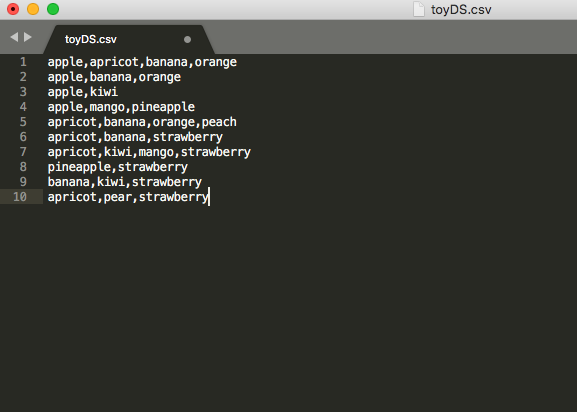

In [19]:
from IPython.display import Image
print ('ScreenShot of the toyDS.csv')
Image("SampleScreen01.png")

In [20]:
# # # # # # # # #  Code for Task 1 # # # # # # # # #

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("dataset_group.csv") 
data.columns = ['date','id','items']
# Preview the first 5 lines of the loaded data 
data.head()

,date,id,items
0,2000-01-01,1,pork
1,2000-01-01,1,sandwich bags
2,2000-01-01,1,lunch meat
3,2000-01-01,1,all- purpose
4,2000-01-01,1,flour


In [21]:
data = data.drop('date', 1)
data.head()

,id,items
0,1,pork
1,1,sandwich bags
2,1,lunch meat
3,1,all- purpose
4,1,flour


In [22]:
# # #  Solution  # # #
newArray = []

dataToAppend  = data.groupby(['id']).get_group(1)

for x in range(1,1140):
    dataToAppend = data.groupby(['id']).get_group(x)
    appendData = dataToAppend["items"].tolist()
    newArray.append(appendData)

In [23]:
with open("dataset.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(newArray)

In [24]:
df_data = pd.read_csv("dataset.csv", sep='delimiter', header=None, engine='python')
print(df_data.head(7))

                                                   0
0  pork,sandwich bags,lunch meat,all- purpose,flo...
1  toilet paper,shampoo,hand soap,waffles,vegetab...
2  soda,pork,soap,ice cream,toilet paper,dinner r...
3  cereals,juice,lunch meat,soda,toilet paper,all...
4  sandwich loaves,pasta,tortillas,mixes,hand soa...
5  laundry detergent,toilet paper,eggs,toilet pap...
6  individual meals,paper towels,tortillas,vegeta...


### Task 2: Run apriory.py and Evaluate Results 

In this task, you have to find how you will be able to execute and print apriory results by making use only the apriory.py. In other words "DO NOT USE ANY OTHER LIBRARY FOR TASK 2!!!". 

(*) For those that are not familiar with python and coding this could be a quite demanding task.


You will have to execute apriori algorithm "3" times for different combinations of support and confidence.
Print the results of apriory for 'dataset.csv' by making use ONLY the provided methods. 

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way. 

You are allowed to use the python print method to print your results. DO NOT add your reasoning as comments. 





# SUPPORT : 
Support of the item x is nothing but the ratio of the number of transactions in which the item x appears to the total number of transactions.
i.e.,
Support(item1) = Number of transactions in which item1 appears / Total number of transaction
# CONFIDENCE : 
Confidence (x => y) signifies the likelihood of the item y being purchased when the item x is purchased. This method takes into account the popularity of the item x.
i.e.,
Confidence({item1, item2} => {item3}) = support(item1, item2, item3) / support(item1, item1)

# Case 1 : (minimum support=0.1 and minimum confidence=0.6)

It will print the itemset that appears in atleast 10% of transaction and rules having atleast 60% confidence.
From the results we can see 73.9% 0f transaction includes vegetables while only 10.1% transaction includes(beef, butter, vegetables) 75 % of customers who have bought individual meals and butter, also have bought vegetables. Similarly, 90% customers who have bought egg and sandwich loaves also bought vegetables. So, it's high likely that new customer who will buy egg and sandwich loaves will also buy vegetables.

In [25]:
print ('# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #') 
print ('Case 1 (minimum support=0.1 and minimum confidence=0.6)')
print ('Case 1 Reasoning: Here we can see from output to many items are considered with too many rule because of very small support.This redundant itemset and rule might not be useful for recommendation.')
print ('Case 1 Output:')
%run apriori.py -f dataset.csv -s 0.1 -c 0.6

# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #
Case 1 (minimum support=0.1 and minimum confidence=0.6)
Case 1 Reasoning: Here we can see from output to many items are considered with too many rule because of very small support.This redundant itemset and rule might not be useful for recommendation.
Case 1 Output:

------------ITEMS-----------------
item: ('fruits', 'pork', 'vegetables') , 0.101
item: ('beef', 'butter', 'vegetables') , 0.101
item: ('hand soap', 'butter', 'vegetables') , 0.103
item: ('pork', 'hand soap', 'vegetables') , 0.104
item: ('fruits', 'juice', 'vegetables') , 0.105
item: ('spaghetti sauce', 'flour', 'vegetables') , 0.106
item: ('sandwich loaves', 'pork', 'vegetables') , 0.106
item: ('vegetables', 'hand soap', 'flour') , 0.106
item: ('pork', 'ice cream', 'vegetables') , 0.106
item: ('shampoo', 'vegetables', 'tortillas') , 0.106
item: ('all- purpose', 'hand soap', 'vegetables') , 0.107
item: ('flour', 'beef', 'vegetables') , 0.107
item: ('paper towels'

Rule: ('bagels', 'aluminum foil') ==> ('vegetables',) , 0.870
Rule: ('dinner rolls', 'waffles') ==> ('vegetables',) , 0.870
Rule: ('sugar', 'eggs') ==> ('vegetables',) , 0.872
Rule: ('juice', 'eggs') ==> ('vegetables',) , 0.872
Rule: ('fruits', 'eggs') ==> ('vegetables',) , 0.873
Rule: ('sandwich loaves', 'yogurt') ==> ('vegetables',) , 0.874
Rule: ('soap', 'eggs') ==> ('vegetables',) , 0.874
Rule: ('sandwich loaves', 'paper towels') ==> ('vegetables',) , 0.874
Rule: ('individual meals', 'eggs') ==> ('vegetables',) , 0.874
Rule: ('lunch meat', 'yogurt') ==> ('vegetables',) , 0.874
Rule: ('lunch meat', 'sugar') ==> ('vegetables',) , 0.875
Rule: ('laundry detergent', 'juice') ==> ('vegetables',) , 0.876
Rule: ('aluminum foil', 'eggs') ==> ('vegetables',) , 0.877
Rule: ('sugar', 'dishwashing liquid/detergent') ==> ('vegetables',) , 0.879
Rule: ('all- purpose', 'eggs') ==> ('vegetables',) , 0.879
Rule: ('sandwich bags', 'eggs') ==> ('vegetables',) , 0.880
Rule: ('eggs', 'poultry') ==> ('ve

# Case 2 : (minimum support=0.15 and minimum confidence=0.65)

 It will print the itemset that appears in atleast 15% of transaction and rules having atleast 65% confidence. From the results we can see 73.9% 0f transaction includes vegetables while only 15% transaction includes(sandwich bags, paper towels)
75.9 % of customers who have bought individual meals, also have bought vegetables. Similarly, 89.9% customers who have bought
eggs and yogurt also bought vegetables. So, it's high likely that new customer who buys eggs and yogurt will
also buy vegetables.

In [26]:
print ('# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #') 
print ('Case 2 (minimum support=0.15 and minimum confidence=0.65)') 
print ('Case 2 Reasoning: From output we can see that support and confidence considered might be appropriate because lots of redundant items and rules have been reduced from case 1')
print ('Case 2 Output:') 
%run apriori.py -f dataset.csv -s 0.15 -c 0.65

# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #
Case 2 (minimum support=0.15 and minimum confidence=0.65)
Case 2 Reasoning: From output we can see that support and confidence considered might be appropriate because lots of redundant items and rules have been reduced from case 1
Case 2 Output:

------------ITEMS-----------------
item: ('juice', 'cheeses') , 0.150
item: ('cereals', 'butter') , 0.150
item: ('shampoo', 'soda') , 0.150
item: ('sandwich bags', 'paper towels') , 0.150
item: ('mixes', 'flour') , 0.150
item: ('pork', 'cheeses') , 0.150
item: ('dinner rolls', 'toilet paper') , 0.150
item: ('pork', 'beef') , 0.150
item: ('all- purpose', 'bagels') , 0.150
item: ('fruits', 'soda') , 0.150
item: ('sandwich loaves', 'shampoo') , 0.150
item: ('spaghetti sauce', 'butter') , 0.150
item: ('sandwich loaves', 'spaghetti sauce') , 0.150
item: ('fruits', 'paper towels') , 0.150
item: ('pork', 'sandwich bags') , 0.150
item: ('cereals', 'pork') , 0.150
item: ('shampoo', 'ice cream

# Case 3 : (minimum support=0.2 and minimum confidence=0.7)

It will print the itemset that appears in atleast 20% of transaction and rules having atleast 70% confidence .From the results we can see 73.9% 0f transaction includes vegetables while only 27% (only for thresold above 20%) transaction includes(hand soap, vegetables). 75.9 % of customers who have bought individual meals, also have bought vegetables. Similarly, 83.8% customers who have bought eggs also bought vegetables. So, it's high likely that new customer buys eggs, will also buy vegetables.

In [27]:
print ('# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #') 
print ('Case 3 (minimum support=0.2 and minimum confidence=0.7)')
print ('Case 3 Reasoning: From output We can see that it might have excluded some important rules and items because of high support and confidence so imoprtant information for recommendation might have missed out')
print ('Case 3 Output:')
%run apriori.py -f dataset.csv -s 0.2 -c 0.7

# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #
Case 3 (minimum support=0.2 and minimum confidence=0.7)
Case 3 Reasoning: From output We can see that it might have excluded some important rules and items because of high support and confidence so imoprtant information for recommendation might have missed out
Case 3 Output:

------------ITEMS-----------------
item: ('hand soap', 'vegetables') , 0.270
item: ('pork', 'vegetables') , 0.270
item: ('flour', 'vegetables') , 0.277
item: ('sandwich loaves', 'vegetables') , 0.283
item: ('vegetables', 'tortillas') , 0.284
item: ('butter', 'vegetables') , 0.284
item: ('individual meals', 'vegetables') , 0.285
item: ('pasta', 'vegetables') , 0.286
item: ('shampoo', 'vegetables') , 0.288
item: ('all- purpose', 'vegetables') , 0.290
item: ('toilet paper', 'vegetables') , 0.290
item: ('coffee/tea', 'vegetables') , 0.290
item: ('paper towels', 'vegetables') , 0.290
item: ('fruits', 'vegetables') , 0.291
item: ('ketchup', 'vegetables') , 0.2

# References

[01] https://www.kaggle.com/acostasg/random-shopping-cart

[02] https://github.com/asaini/Apriori


# Rubric
* [02 points] - Student Details 
* [08 points] - Comply with submission instructions 
* [30 points] - DataSet Preprocess 
* [30 points] - Run apriory.py
* [30 points] - Evaluate Results 
